In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [73]:
df = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


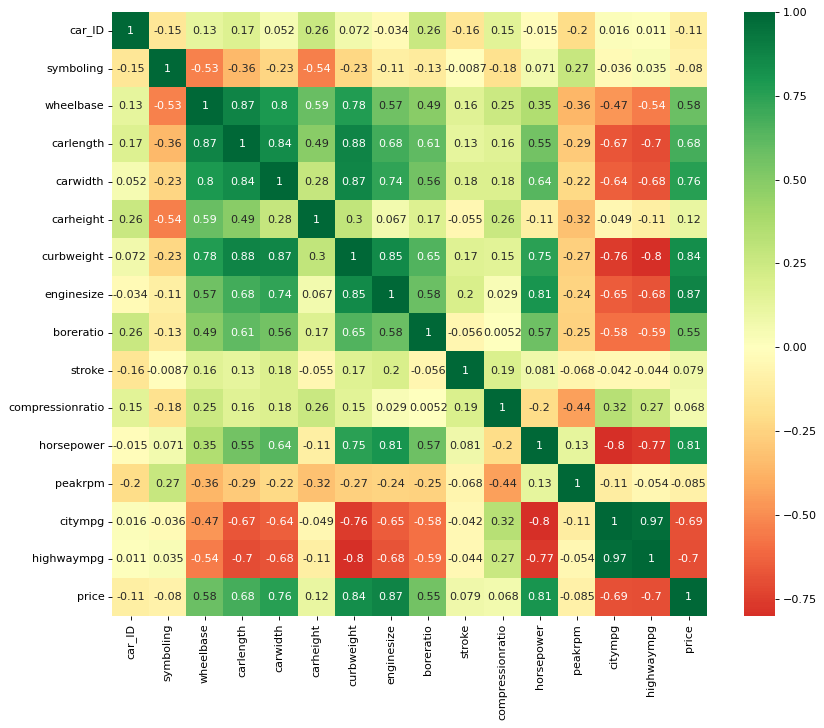

In [74]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
#наибольшая корреляция с enginesize

In [75]:
y=(df["price"])
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [76]:
x=df.drop(columns = ['price','citympg','peakrpm','compressionratio','stroke','boreratio','carheight','car_ID','symboling','CarName','fueltype','symboling','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','enginetype','fuelsystem','cylindernumber','carlength'])

x

,carwidth,curbweight,enginesize,horsepower,highwaympg
0,64.1,2548,130,111,27
1,64.1,2548,130,111,27
2,65.5,2823,152,154,26
3,66.2,2337,109,102,30
4,66.4,2824,136,115,22
...,...,...,...,...,...
200,68.9,2952,141,114,28
201,68.8,3049,141,160,25
202,68.9,3012,173,134,23
203,68.9,3217,145,106,27


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (143, 5), (143,)
Test dataset size: (62, 5), (62,)


In [78]:
X_test

,carwidth,curbweight,enginesize,horsepower,highwaympg
178,67.7,2976,171,161,24
17,70.9,3505,209,182,20
46,65.2,2734,119,90,29
53,64.2,1945,91,68,38
74,72.0,3715,304,184,16
...,...,...,...,...,...
137,66.5,2847,121,160,26
41,65.2,2465,110,101,28
138,63.4,2050,97,69,36
45,63.6,1909,90,70,43


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)  
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [583.96466595   3.25609369  84.29559211  49.8826185   80.09188545]
Свободный коэффицент уравнения w0: -52012.479612419425


In [ ]:
print("y =",  model.coef_[0],"+",model.intercept_,"enginesize")

In [81]:
y_pred = model.predict(X_test)
y_pred

array([21579.91616032, 29101.47659779, 11807.4525476 ,  5917.56274689,
       38215.09634986,  8664.98165915, 23100.61755227,  -173.07611605,
        5671.31534948,  5815.46208287, 23743.63002863,  6136.74851042,
        6884.45119339,  9020.76046173, 17946.18386274, 10995.66864022,
        8906.79718274, 10739.03659205,  6244.19960204,  6900.73166182,
        5671.31534948, 13730.90453057,  7075.04507187,  7013.56491817,
       18832.26592666,  8817.60699159,  6980.15110235, 21710.15990773,
       14719.71668271, 11754.34038625, 18006.40075268, 14819.48191971,
       10153.89918592,  7242.59131608,  4358.87118417, 22154.93712418,
        9392.50307964,  5752.04241525,  6271.01239904, 12117.58430371,
        6162.59374656, 15514.97421471,  6899.60163918,  6179.07772833,
       17896.51367596, 24049.35827594, 22879.20318166, 18365.02672787,
        6364.67506839,  8832.71839339,  7038.76078869, 11616.21655709,
       11624.09663883, 16227.65636897, 15098.19422299,  7925.18511511,
      

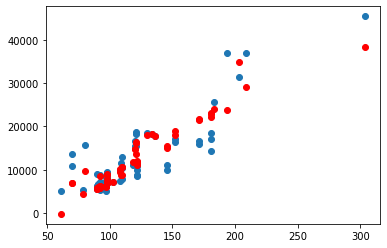

In [82]:
import matplotlib.pyplot as plt


plt.scatter(X_test['enginesize'], y_test)
plt.scatter(X_test['enginesize'], y_pred, color='red', linewidth=1);
plt.show()

In [83]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2377.0964791533893
Mean Squared Error: 11893205.680272305
R2 score: 0.8139589421907134


In [38]:
#MSE далек от 0 значит модель работает плохо
#Уравнение регрессии y = 163.4387180962493 + -7348.4665520288345 enginesize
#